# Dog or Cat: Image Classification with CNN
In this example, you will classify whether an image contains either a dog or a cat. The **Dogs vs Cats** dataset was used for a Kaggle machine learning competition held in 2013, back when CNN was not mainstream. The dataset contains 25,000 photos for training (12,500 from each class); and 12,500 unlabeled photos for testing. Unsurprisingly, the dogs-vs-cats Kaggle competition in 2013 was won by entrants who used CNN, achieving up to 95% accuracy.

As a practical example, we will only use a small subset of the dataset containing 2,000 images for training, 1,000 for validation and 1,000 for testing.

In this tutorial, you will learn:
1. how to set up Google Colab.
 * how to access the Google Drive in the Google Colab.
 * how to download dataset from Kaggle directly to Google Drive.
 * how to enable GPU for traing your model
2. how to train a small ConvNet from scratch, without any regularization. It would set a baseline for what can be achieved.



## Setting-Up 1: Mount Google Drive to the notebook


You can easily load data from Google Drive by mounting it to the notebook. To do this, type the following code in your notebook. Run it, you will see a link, and need enter some code. To get the code, you need first click the link. In the link, after logining to your Google Account, you will see a code. Copy it, and paste it here.

Then you will see "Mounted at /content/drive" -- done!

Now you will see your Google Drive files in the left pane (file explorer). Right click on the file and select 'Copy path'. Your file's full path will be like `/content/gdrive/MyDrive/Colab Notebooks/dogs_vs_cats.ipynb`.

Your current directory will be `/content/`


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setting-Up 2: Download the dataset directly to Google Drive
Follow the steps below, you will be able to download Kaggele datasets to google drive via Kaggle API. To do it, you need

**Step 1** — Get the API key from your Kaggle account (Yes, **you need have a Kaggle account**.):

Visit www.kaggle.com ⇨ login ⇨ Your profile ⇨ Setting ⇨ API ⇨ Create New API Token

The “kaggle.json” file will be automatically downloaded.

**Step 2** - Upload the kaggle.json file

The following code will ask you to upload the kaggle.json to Google Colab.

In [3]:
from google.colab import files
files.upload() #upload kaggle.json you just downloaded

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hongpingcai","key":"607a8229ee44e2da6fa7a7aa9be1c618"}'}

The below will install the kaggle API, and create the necessary folder path.

In [4]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


**Step 3** — Download the required dataset and unzip it

Simply download the required dataset with the syntax:

`!kaggle competitions download -c ‘name_of_competition’ -p “target_colab_dir”`

Then unzip the `train.zip` to the folder `data/dogs-vs-cat/`. We don't need unzip the `test1.zip` (you may even delete it to save space), as there is no label information for the images in `test1.zip`. Therefore, the small dataset we will create will all come from `train.zip`.

The unzipping may take some time. When finished, you will have a `train/` folder that contains 25,000 JPEG files of dogs and cats. In case that not all the files are extracted, it is better to **check if there are truely 25,000 files** in the `train/` folder. To get the dataset's full path, in the left panel (file explorer), right click on the folder and select 'Copy path'.

The photos are labeled by their filename, with the word “dog” or “cat“. The file naming convention is as follows:
- cat.0.jpg
- cat.51.jpg
- cat.1140.jpg
- dog.40.jpg
- dog.1425.jpg
- ...

In [10]:
# Let's say you would like to save the data in data/dogs-vs-cats, first create it
!mkdir /content/drive/MyDrive/Colab\ Notebooks/data
!mkdir /content/drive/MyDrive/Colab\ Notebooks/data/dogs-vs-cats
# download the data using Kaggle API
!kaggle competitions download -c dogs-vs-cats -p /content/drive/MyDrive/Colab\ Notebooks/data/dogs-vs-cats
# Change the directory and unzip it
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/data/dogs-vs-cats')  #change dir
#!unzip -o train.zip -d .  #unzip data, a folder train/ will be created
!unzip -o dogs-vs-cats.zip -d .  #unzip data, a folder train/ will be created
!unzip -o train.zip -d .
# Check if there are 25,000 files in the train/ folder.
folder = '/content/drive/MyDrive/Colab Notebooks/data/dogs-vs-cats/train/'
num_files = len([f for f in os.listdir(folder)if os.path.isfile(os.path.join(folder, f))])
print("num of files in train/:%d" % (num_files))
# If all worked well, you may choose to remove the zip files to save some space
!rm /content/drive/MyDrive/Colab\ Notebooks/data/dogs-vs-cats/*.zip

Streaming output truncated to the last 5000 lines.
  inflating: ./train/dog.55.jpg      
  inflating: ./train/dog.550.jpg     
  inflating: ./train/dog.5500.jpg    
  inflating: ./train/dog.5501.jpg    
  inflating: ./train/dog.5502.jpg    
  inflating: ./train/dog.5503.jpg    
  inflating: ./train/dog.5504.jpg    
  inflating: ./train/dog.5505.jpg    
  inflating: ./train/dog.5506.jpg    
  inflating: ./train/dog.5507.jpg    
  inflating: ./train/dog.5508.jpg    
  inflating: ./train/dog.5509.jpg    
  inflating: ./train/dog.551.jpg     
  inflating: ./train/dog.5510.jpg    
  inflating: ./train/dog.5511.jpg    
  inflating: ./train/dog.5512.jpg    
  inflating: ./train/dog.5513.jpg    
  inflating: ./train/dog.5514.jpg    
  inflating: ./train/dog.5515.jpg    
  inflating: ./train/dog.5516.jpg    
  inflating: ./train/dog.5517.jpg    
  inflating: ./train/dog.5518.jpg    
  inflating: ./train/dog.5519.jpg    
  inflating: ./train/dog.552.jpg     
  inflating: ./train/dog.5520.jpg    

## Setting-Up 3: One click to enable FREE GPU
After you mounted your Google Drive and downloaded the dataset, let’s enable GPU in your Colab notebook and train your model. In Google Colab, it is very easy to do so.

From task bar, click: Runtime ⇨ Change runtime type

Choose 'GPU' in the Hardware accelerator.

## Visualize a few photos
Display a few dog and cat images in the `train/` folder to have a first impression of the dataset. You must see that the photos are all different sizes, and also have almost all the challenges for visual recognition, such as intra-class variation, background clustter, deformation, viewpoint variation, scale variation, and so on.

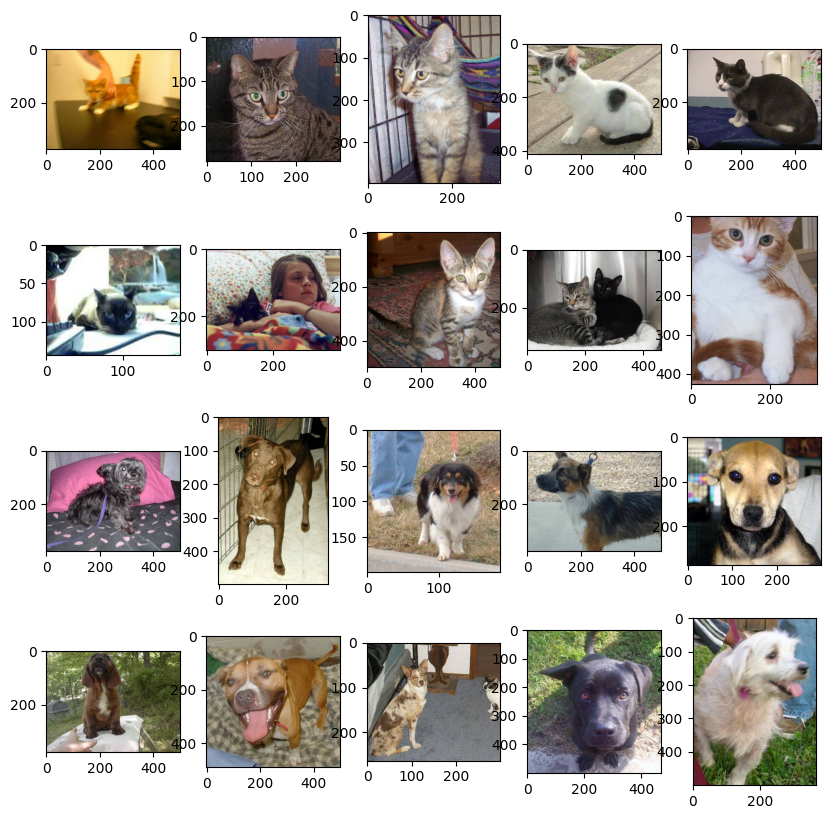

In [17]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Colab Notebooks/data/dogs-vs-cats/train/'
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(4,5,i+1)
    filename = folder + 'cat.' + str(i) + '.jpg'
    if not os.path.exists(filename):
      print ('No such file:'+filename)
    image = imread(filename)
    plt.imshow(image)
for i in range(10):
    plt.subplot(4,5,i+11)
    filename = folder + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
plt.show()

## Create the small dataset
We will create a new dataset containing three subsets: a training set with 1000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class. This step could also take some time.

In [2]:
import os, shutil
gdrive_dir = '/content/drive/MyDrive/Colab Notebooks'
original_dataset_dir = gdrive_dir+'/data/dogs-vs-cats/train'


base_dir = gdrive_dir+'/data/dogs-vs-cats-small'
train_dir = os.path.join(base_dir,'train')
val_dir   = os.path.join(base_dir,'val')
test_dir  = os.path.join(base_dir,'test')

if not os.path.exists(base_dir):
  os.mkdir(base_dir)
  print("create base_dir")
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
if not os.path.exists(val_dir):
  os.mkdir(val_dir)
if not os.path.exists(test_dir):
  os.mkdir(test_dir)

n_train_per_class = 1000
n_val_per_class = 500
n_test_per_class = 500
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
val_cats_dir   = os.path.join(val_dir,'cats')
val_dogs_dir   = os.path.join(val_dir,'dogs')
test_cats_dir  = os.path.join(test_dir,'cats')
test_dogs_dir  = os.path.join(test_dir,'dogs')

# train/cats
print("Copying data to dogs-vs-cats-small/train/cats/ ...")
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
    fnames = ['cat.{}.jpg'.format(i) for i in range(n_train_per_class)]
    i = 0
    for fname in fnames:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(train_cats_dir,fname)
        shutil.copyfile(src, dst)
        i+=1
    print("%d training images for cat." % (i))

# train/dogs
print("Copying data to dogs-vs-cats-small/train/dogs/ ...")
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
    fnames = ['dog.{}.jpg'.format(i) for i in range(n_train_per_class)]
    i = 0
    for fname in fnames:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(train_dogs_dir,fname)
        shutil.copyfile(src, dst)
        i+=1
    print("%d training images for dog." % (i))

# val/cats
print("Copying data to dogs-vs-cats-small/val/cats/ ...")
if not os.path.exists(val_cats_dir):
    os.mkdir(val_cats_dir)
    fnames = ['cat.{}.jpg'.format(i) for i in range(n_train_per_class, n_train_per_class+n_val_per_class)]
    i = 0
    for fname in fnames:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(val_cats_dir,fname)
        shutil.copyfile(src, dst)
        i+=1
    print("%d validation images for cat." % (i))

# val/dogs
print("Copying data to dogs-vs-cats-small/val/dogs/ ...")
if not os.path.exists(val_dogs_dir):
    os.mkdir(val_dogs_dir)
    fnames = ['dog.{}.jpg'.format(i) for i in range(n_train_per_class, n_train_per_class+n_val_per_class)]
    i = 0
    for fname in fnames:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(val_dogs_dir,fname)
        shutil.copyfile(src, dst)
        i+=1
    print("%d validation images for dog." % (i))

# test/cats
print("Copying data to dogs-vs-cats-small/test/cats/ ...")
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
    fnames = ['cat.{}.jpg'.format(i) for i in range(n_train_per_class+n_val_per_class,n_train_per_class+n_val_per_class+n_test_per_class)]
    i = 0
    for fname in fnames:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(test_cats_dir,fname)
        shutil.copyfile(src, dst)
        i+=1
    print("%d test images for cat." % (i))

# test/dogs
print("Copying data to dogs-vs-cats-small/test/dogs/ ...")
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)
    fnames = ['dog.{}.jpg'.format(i) for i in range(n_train_per_class+n_val_per_class,n_train_per_class+n_val_per_class+n_test_per_class)]
    i = 0
    for fname in fnames:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(test_dogs_dir,fname)
        shutil.copyfile(src, dst)
        i+=1
    print("%d test images for dog." % (i))

print("Done!")

create base_dir
Copying data to dogs-vs-cats-small/train/cats/ ...
1000 training images for cat.
Copying data to dogs-vs-cats-small/train/dogs/ ...
1000 training images for dog.
Copying data to dogs-vs-cats-small/val/cats/ ...
500 validation images for cat.
Copying data to dogs-vs-cats-small/val/dogs/ ...
500 validation images for dog.
Copying data to dogs-vs-cats-small/test/cats/ ...
500 test images for cat.
Copying data to dogs-vs-cats-small/test/dogs/ ...
500 test images for dog.
Done!


## STEP 1: Build the CNN network
Since we only have 2000 images for training, we will use a small convnet with 4 convolutional layers. Here, because you start from inputs of size 150 x 150, you end up with feature maps of size 7 x 7 just before the `Flatten` layer.

Note that the depth of the feature maps progressively increases in the network (from 32 to 128), whereas the size of the feature maps decreases (from 148 x 148 to 7 x 7). This is a pattern you'll see in most CNNs.

Because this is a binary-classficatin problem, you'll end the network with a single neuron (a `Dense` layer of size 1) and a `sigmoid` activation function, which will encode the probability that the network is looking at one class or the other.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

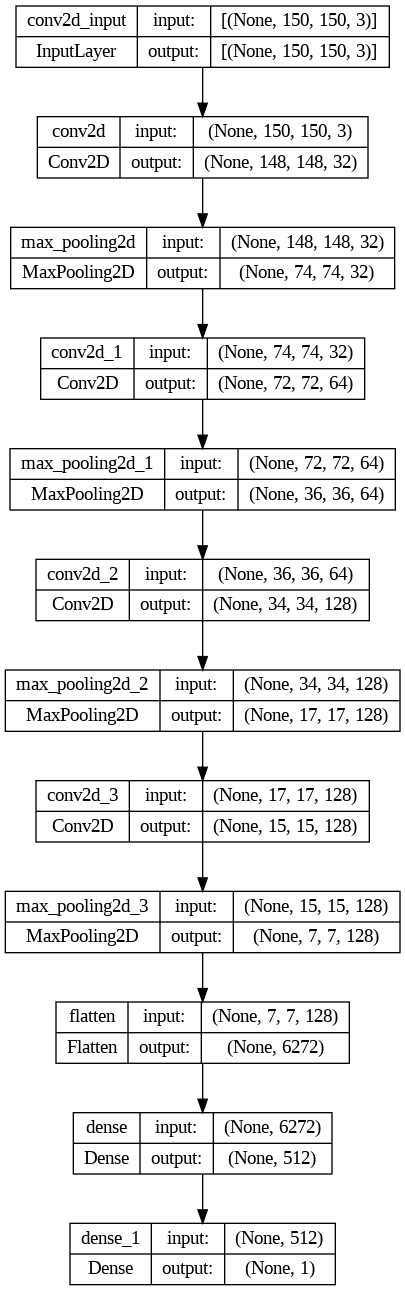

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True) # visualize the CNN artitecture

## STEP 2: Compile the model
The typical loss function for a binary classification problem is the binary cross-entropy loss function.

In [4]:
model.compile(loss='binary_crossentropy',
            optimizer='adam',#adam (with default parameters) is always a good choice
            metrics=['accuracy'])

## STEP 3: Data preprocessing
Now we need do some pre-processing before feeding the data into the network. Roughly, the preprocessing consists of following steps.
1. Read the picture files, decode them to RGB grids of pixels
2. Rescale the pixel values (integers between 0 and 255) to the [0,1] interval, as neural networks prefer to deal with small input values.

Keras has a module with image-processing helper tools, located at `keras.preprocessing.image`. In particular, it contains the class `ImageDataGenerator`. This class allows you to:

1. do some random transformations and normalization operations on the training images (which we will use this function for data augmentation next week.)
2. use the method `.flow_from_directory()` to generate batches of image data (and their labels) directly from our jpgs in their respective folders.

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 20
# this is a generator that will read pictures found in
# subfolers of training data, and indefinitely generate
# batches of training image data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),# all images will be resized to 150x150
    batch_size=batch_size,
    class_mode='binary')# since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## STEP 4: Train the model
Let's fit the model to the data using the generator. You do so using the `fig_generator()` method, the equivalent of `fit()`. It expects as its first argument a Python genrator that will yield batches of inputs and targets indefinitely. Since the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the `steps_per_epoch` argument.

It is a good practice to always save your models after training.

After training, also plot the loss and accuracy of the model over the training and validation set.

Epoch 1/20
100/100 [==============================] - 22s 98ms/step - loss: 0.6943 - accuracy: 0.5310 - val_loss: 0.6805 - val_accuracy: 0.5990
Epoch 2/20
100/100 [==============================] - 11s 112ms/step - loss: 0.6770 - accuracy: 0.5775 - val_loss: 0.6429 - val_accuracy: 0.6280
Epoch 3/20
100/100 [==============================] - 10s 100ms/step - loss: 0.6325 - accuracy: 0.6365 - val_loss: 0.6226 - val_accuracy: 0.6810
Epoch 4/20
100/100 [==============================] - 11s 115ms/step - loss: 0.5975 - accuracy: 0.6820 - val_loss: 0.6716 - val_accuracy: 0.6520
Epoch 5/20
100/100 [==============================] - 9s 88ms/step - loss: 0.5624 - accuracy: 0.7095 - val_loss: 0.5569 - val_accuracy: 0.6980
Epoch 6/20
100/100 [==============================] - 10s 98ms/step - loss: 0.5277 - accuracy: 0.7365 - val_loss: 0.5523 - val_accuracy: 0.7050
Epoch 7/20
100/100 [==============================] - 10s 103ms/step - loss: 0.4886 - accuracy: 0.7535 - val_loss: 0.5784 - val_accura

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Text(0.5, 0, 'epoch')

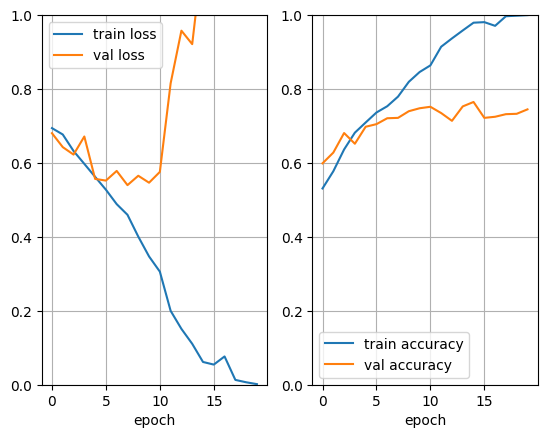

In [7]:
history=model.fit(
        train_generator,
        steps_per_epoch=n_train_per_class*2 // batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=n_val_per_class*2 // batch_size)
model_folder = '/content/drive/MyDrive/Colab Notebooks/models'
import os
if not os.path.exists(model_folder):
    os.mkdir(model_folder)
model.save(model_folder+'/dogs_cats_small_1.h5')  # always save your model after training

# plot the learning curves
import matplotlib.pyplot as plt
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.grid(True)
plt.ylim([0,1.0])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
plt.ylim([0,1.0])
plt.xlabel('epoch')

The plots shown above exhibit clear signs of overfitting. Notably, the validation loss stopped dropping after around 5 epochs, while the training loss keeps decreasing almost to 0. After 5 epochs, the validation accuracy plateaus at around 72%.

We have only 2000 images for training, while there are 3.45 million parameters in even such a small CNN. Therefore, overfitting is our primary concern. In the upcoming lectures, we will delve into several strategies to mitigate the overfitting problem.

## STEP 5: Evaluate the model on the test set

We first omit this step, since the model we trained is still a baseline. We will investigate how to improve the model later. Then we can evaluate it on the test set.